### Analysis: 2015 Alcohol Consumption and Annual Temperature

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [28]:
df = pd.read_csv('../data/modified/left_merge_table.csv')
df.dropna(how='any', inplace=True)

### Statisical Comparison and Graphing

In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 256
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             249 non-null    int64  
 1   ethanol_beer_gallons_per_capita        249 non-null    float64
 2   ethanol_wine_gallons_per_capita        249 non-null    float64
 3   ethanol_spirit_gallons_per_capita      249 non-null    float64
 4   ethanol_all_drinks_gallons_per_capita  249 non-null    float64
 5   number_of_beers                        249 non-null    float64
 6   number_of_glasses_wine                 249 non-null    float64
 7   number_of_shots_liquor                 249 non-null    float64
 8   number_of_drinks_total                 249 non-null    float64
 9   STATE                                  249 non-null    object 
 10  ANN                                    249 non-null    float64
dtypes: flo

,Unnamed: 0,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,ANN
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,126.626506,1.165542,0.411888,0.872008,2.449799,276.277269,81.738996,181.049920,522.624538,104.493976
std,74.354216,0.183961,0.163764,0.234254,0.426966,43.605633,32.498892,48.636768,91.086137,7.703225
min,0.000000,0.650000,0.110000,0.470000,1.400000,154.070000,21.830000,97.580000,298.670000,66.000000
25%,63.000000,1.010000,0.300000,0.700000,2.190000,239.410000,59.530000,145.340000,467.200000,102.000000
50%,126.000000,1.120000,0.400000,0.780000,2.280000,265.480000,79.380000,161.950000,486.400000,105.000000
75%,190.000000,1.280000,0.530000,0.980000,2.730000,303.410000,105.180000,203.470000,582.400000,109.000000
max,256.000000,1.870000,1.140000,1.950000,4.700000,443.260000,226.230000,404.870000,1002.670000,122.000000


### MannWhitneyU Test

In [30]:
u_beers = stats.mannwhitneyu(df['ANN'], df['number_of_beers'])
u_wine = stats.mannwhitneyu(df['ANN'], df['number_of_glasses_wine'])
u_shots = stats.mannwhitneyu(df['ANN'], df['number_of_shots_liquor'])
u_total = stats.mannwhitneyu(df['ANN'], df['number_of_drinks_total'])

u_results = (f'MannWhitneyU Results: Number of Beers: {u_beers};   Number of Glasses Wine:{u_wine};    Number of Shots{u_shots};    Total Drinks: {u_total};')
u_results

'MannWhitneyU Results: Number of Beers: MannwhitneyuResult(statistic=0.0, pvalue=1.955263257631872e-83);   Number of Glasses Wine:MannwhitneyuResult(statistic=14136.0, pvalue=3.939313034921851e-26);    Number of ShotsMannwhitneyuResult(statistic=929.0, pvalue=1.2869623103039633e-78);    Total Drinks: MannwhitneyuResult(statistic=0.0, pvalue=2.0344285545615244e-83);'

### Pearsonr

In [31]:
p_beers = stats.pearsonr(df['ANN'], df['number_of_beers'])
p_wine = stats.pearsonr(df['ANN'], df['number_of_glasses_wine'])
p_shots = stats.pearsonr(df['ANN'], df['number_of_shots_liquor'])
p_total = stats.pearsonr(df['ANN'], df['number_of_drinks_total'])

p_results = (f'Pearsonr Results: Number of Beers: {p_beers};   Number of Glasses Wine:{p_wine};    Number of Shots{p_shots};    Total Drinks: {p_total};')
p_results

'Pearsonr Results: Number of Beers: (0.03879235442721353, 0.5423373090312318);   Number of Glasses Wine:(-0.28972604526774554, 3.337259516630482e-06);    Number of Shots(-0.4066398894076336, 2.4714372269605796e-11);    Total Drinks: (-0.3182628401611133, 2.884092681348871e-07);'

### Spearmanr

In [32]:
s_beers_gal = stats.spearmanr(df['ANN'], df['ethanol_beer_gallons_per_capita'])
s_wine_gal = stats.spearmanr(df['ANN'], df['ethanol_wine_gallons_per_capita'])
s_shots_gal = stats.spearmanr(df['ANN'], df['ethanol_spirit_gallons_per_capita'])
s_total_gal = stats.spearmanr(df['ANN'], df['ethanol_all_drinks_gallons_per_capita']) 

p_results = (f'Spearmanr Results: Number of Beers: {s_beers_gal};   Number of Glasses Wine:{s_wine_gal};    Number of Shots{s_shots_gal};    Total Drinks: {s_total_gal};')
p_results

'Spearmanr Results: Number of Beers: SpearmanrResult(correlation=0.11799328357017054, pvalue=0.06302242402319819);   Number of Glasses Wine:SpearmanrResult(correlation=-0.339638537681751, pvalue=3.869617173537449e-08);    Number of ShotsSpearmanrResult(correlation=-0.3008408600008164, pvalue=1.32615598730314e-06);    Total Drinks: SpearmanrResult(correlation=-0.22470174841968737, pvalue=0.0003519710919161753);'

### Categorical Plotting Stat Tests

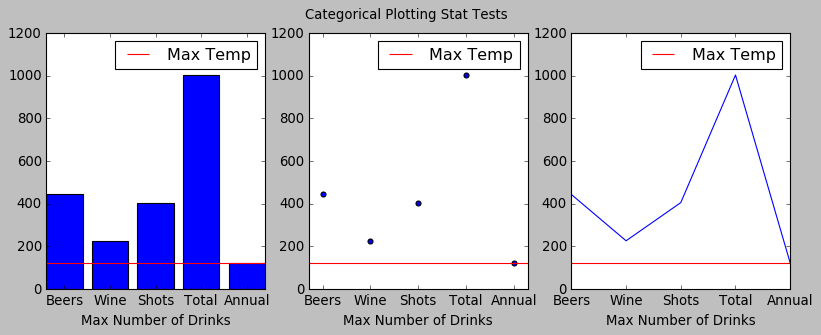

In [33]:
names = ['Beers', 'Wine', 'Shots', 'Total', 'Annual']
max_values = [443, 226, 405, 1003, 122]

plt.figure(figsize=(12,4))
# plt.hlines(122, 0, 5)
plt.subplot(131)
plt.xlabel("Max Number of Drinks")
plt.hlines(122,-2,6,colors = 'red', label = 'Max Temp')
plt.legend()
plt.bar(names, max_values, label = 'Max Drinks. ')
plt.subplot(132)
plt.xlabel("Max Number of Drinks")
plt.hlines(122,-2,6,colors = 'red', label = 'Max Temp')
plt.legend()
plt.scatter(names, max_values)
plt.subplot(133)
plt.xlabel("Max Number of Drinks")
plt.hlines(122,-2,6, colors = 'red', label = 'Max Temp')
plt.legend()
plt.plot(names, max_values)

plt.suptitle("Categorical Plotting Stat Tests")
plt.savefig('../img/categorical_analysis.jpg', dpi = 300)
plt.show()

### Scatter Plots

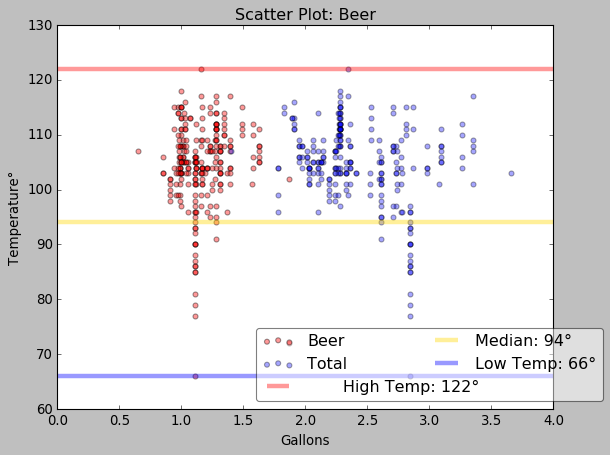

In [34]:
plt.scatter(df['ethanol_beer_gallons_per_capita'], df['ANN'],alpha=0.4, c = 'red',label='Beer')
# plt.scatter(df['ethanol_wine_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'yellow',label='Wine')
# plt.scatter(df['ethanol_spirit_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'green',label='Shots')
plt.scatter(df['ethanol_all_drinks_gallons_per_capita'], df['ANN'],alpha=0.35, c = 'blue',label='Total')
plt.xlabel('Gallons')
plt.ylabel('Temperature°')

plt.hlines(122,-2,6,colors = 'red', alpha = 0.4, linewidth = 4, label = '       High Temp: 122°')
plt.hlines(94,-2,6,colors = 'gold', alpha = 0.4, linewidth = 4, label = 'Median: 94°')
plt.hlines(66,-2,6,colors = 'blue', alpha = 0.4, linewidth = 4, label = 'Low Temp: 66°')

plt.xlim((0,4))

plt.title('Scatter Plot: Beer')
plt.legend(loc = 'lower right', fancybox=True, framealpha=0.5, bbox_to_anchor=(0.4, .02, 0.70, .102),ncol=2,mode="expand",borderaxespad=0.)
plt.savefig('../img/scatter_beer_gallons.jpg', dpi = 150)
plt.show();

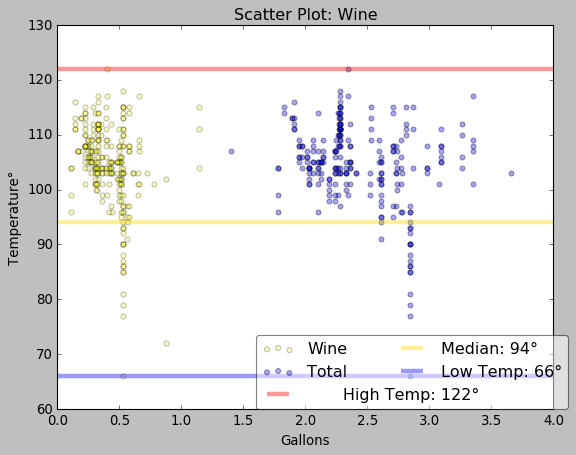

In [35]:
# plt.scatter(df['ethanol_beer_gallons_per_capita'], df['ANN'],alpha=0.4, c = 'red',label='Beer')
plt.scatter(df['ethanol_wine_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'yellow',label='Wine')
# plt.scatter(df['ethanol_spirit_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'green',label='Shots')
plt.scatter(df['ethanol_all_drinks_gallons_per_capita'], df['ANN'],alpha=0.35, c = 'blue',label='Total')
plt.xlabel('Gallons')
plt.ylabel('Temperature°')

plt.hlines(122,-2,6,colors = 'red', alpha = 0.4, linewidth = 4, label = '       High Temp: 122°')
plt.hlines(94,-2,6,colors = 'gold', alpha = 0.4, linewidth = 4, label = 'Median: 94°')
plt.hlines(66,-2,6,colors = 'blue', alpha = 0.4, linewidth = 4, label = 'Low Temp: 66°')

plt.xlim((0,4))

plt.title('Scatter Plot: Wine')
plt.legend(loc = 'lower right', fancybox=True, framealpha=0.5, bbox_to_anchor=(0.4, 0, 0.63, .102),ncol=2,mode="expand",borderaxespad=0.)
plt.savefig('../img/scatter_wine_gallons.jpg', dpi = 150)
plt.show();

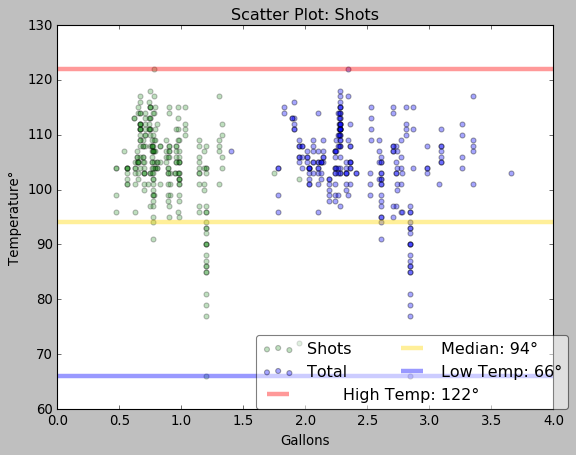

In [36]:
# plt.scatter(df['ethanol_beer_gallons_per_capita'], df['ANN'],alpha=0.4, c = 'red',label='Beer')
# plt.scatter(df['ethanol_wine_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'yellow',label='Wine')
plt.scatter(df['ethanol_spirit_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'green',label='Shots')
plt.scatter(df['ethanol_all_drinks_gallons_per_capita'], df['ANN'],alpha=0.35, c = 'blue',label='Total')
plt.xlabel('Gallons')
plt.ylabel('Temperature°')

plt.hlines(122,-2,6,colors = 'red', alpha = 0.4, linewidth = 4, label = '       High Temp: 122°')
plt.hlines(94,-2,6,colors = 'gold', alpha = 0.4, linewidth = 4, label = 'Median: 94°')
plt.hlines(66,-2,6,colors = 'blue', alpha = 0.4, linewidth = 4, label = 'Low Temp: 66°')

plt.xlim((0,4))

plt.title('Scatter Plot: Shots')
plt.legend(loc = 'lower right', fancybox=True, framealpha=0.5, bbox_to_anchor=(0.4, 0, 0.63, .102),ncol=2,mode="expand",borderaxespad=0.)
plt.savefig('../img/scatter_shot_gallons.jpg', dpi = 150)
plt.show();

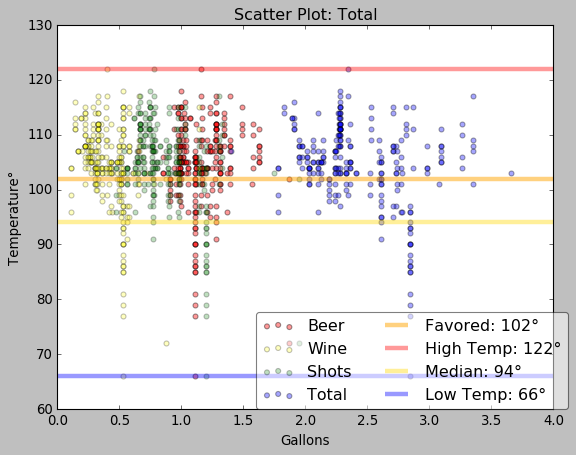

In [40]:
plt.scatter(df['ethanol_beer_gallons_per_capita'], df['ANN'],alpha=0.4, c = 'red',label='Beer')
plt.scatter(df['ethanol_wine_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'yellow',label='Wine')
plt.scatter(df['ethanol_spirit_gallons_per_capita'], df['ANN'],alpha=0.25, c = 'green',label='Shots')
plt.scatter(df['ethanol_all_drinks_gallons_per_capita'], df['ANN'],alpha=0.35, c = 'blue',label='Total')
plt.xlabel('Gallons')
plt.ylabel('Temperature°')

plt.hlines(102,-2,6,colors = 'orange', alpha = 0.5, linewidth = 4, label = 'Favored: 102°')

plt.hlines(122,-2,6,colors = 'red', alpha = 0.4, linewidth = 4, label = 'High Temp: 122°')
plt.hlines(94,-2,6,colors = 'gold', alpha = 0.4, linewidth = 4, label = 'Median: 94°')
plt.hlines(66,-2,6,colors = 'blue', alpha = 0.4, linewidth = 4, label = 'Low Temp: 66°')

plt.xlim((0,4))

plt.title('Scatter Plot: Total')
plt.legend(loc = 'lower right', fancybox=True, framealpha=0.5, bbox_to_anchor=(0.4, 0, 0.63, .102),ncol=2,mode="expand",borderaxespad=0.)
plt.savefig('../img/scatter_annual_gallons.jpg', dpi = 150)
plt.show();

In [38]:
df.describe()

,Unnamed: 0,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,ANN
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,126.626506,1.165542,0.411888,0.872008,2.449799,276.277269,81.738996,181.049920,522.624538,104.493976
std,74.354216,0.183961,0.163764,0.234254,0.426966,43.605633,32.498892,48.636768,91.086137,7.703225
min,0.000000,0.650000,0.110000,0.470000,1.400000,154.070000,21.830000,97.580000,298.670000,66.000000
25%,63.000000,1.010000,0.300000,0.700000,2.190000,239.410000,59.530000,145.340000,467.200000,102.000000
50%,126.000000,1.120000,0.400000,0.780000,2.280000,265.480000,79.380000,161.950000,486.400000,105.000000
75%,190.000000,1.280000,0.530000,0.980000,2.730000,303.410000,105.180000,203.470000,582.400000,109.000000
max,256.000000,1.870000,1.140000,1.950000,4.700000,443.260000,226.230000,404.870000,1002.670000,122.000000


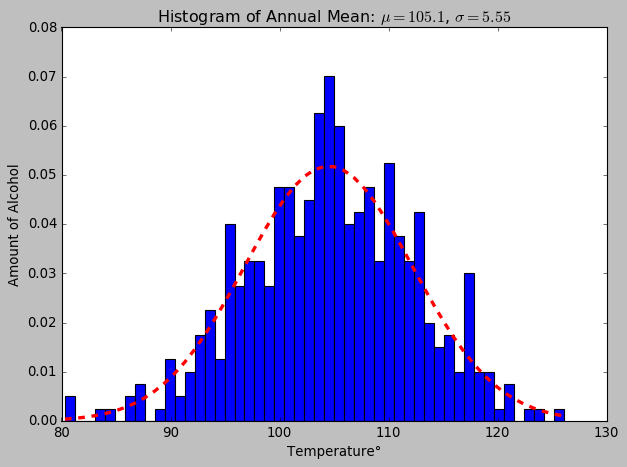

In [39]:
np.random.seed(19680801)
plt.style.use('classic')
# example data
mu = df['ANN'].mean()  # mean of distribution
sigma = df['ANN'].std()  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color = 'red', linewidth = 3)
# plt.axvlines(102, 0, 10)
ax.set_xlabel('Temperature°')
ax.set_ylabel('Amount of Alcohol')
ax.set_title(r'Histogram of Annual Mean: $\mu=105.1$, $\sigma=5.55$')
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()